In [295]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

RAND_NU = 4/3
RAND_GAMMA = 43/18
RAND_BETA = 5/36
RAND_BETA_OVER_NU = RAND_BETA / RAND_NU
RAND_GAMMA_OVER_NU = RAND_GAMMA / RAND_NU

In [296]:
df = pd.read_csv('../data/data.csv', sep=';')
df

,attack,fc,fc_err,gamma_over_nu,gamma_over_nu_err,beta_over_nu_2,beta_over_nu_2_err,beta_over_nu,beta_over_nu_err
0,Ran,0.500319,0.000289,1.702692,0.007573,0.110766,0.010862,0.091502,0.008829
1,Deg,0.304286,0.000445,1.599535,0.006505,0.099533,0.018494,0.163614,0.004813
2,DegU,0.375092,0.001205,1.657302,0.023291,0.102993,0.030069,0.113411,0.020637
3,Btw_cutoff2,0.299709,0.000835,1.589190,0.001851,0.096957,0.014272,0.178848,0.005981
4,Btw_cutoff3,0.279600,0.000499,1.571765,0.007668,0.148605,0.019429,0.175322,0.003667
5,Btw_cutoff4,0.270003,0.001055,1.573472,0.016050,0.102590,0.016018,0.186802,0.006967
6,Btw_cutoff6,0.246600,0.018881,1.550424,0.016018,0.055545,0.045710,0.196290,0.011493
7,Btw_cutoff8,0.257299,0.008903,1.432432,0.046606,0.207640,0.018075,0.249650,0.025896
8,BtwU_cutoff2,0.334521,0.000918,1.722050,0.037833,0.150321,0.039334,0.026422,0.049013
9,BtwU_cutoff3,0.329087,0.019116,1.741661,0.049365,-0.040703,0.047820,0.041534,0.043000


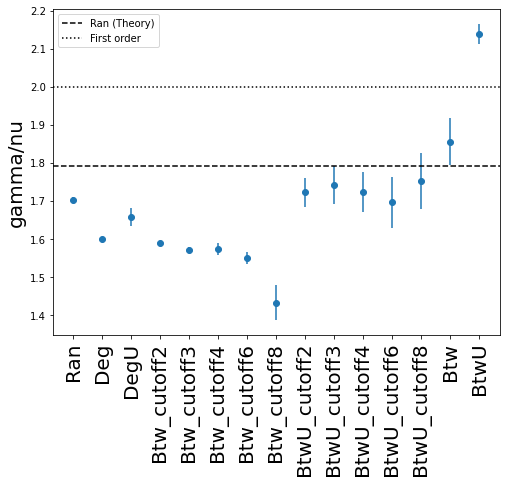

In [297]:
fig, ax = plt.subplots(figsize=(8,6))

X = range(df.shape[0])

ax.set_ylabel('gamma/nu', fontsize=20)
ax.axhline(RAND_GAMMA_OVER_NU, linestyle='--', color='k', label='Ran (Theory)')
ax.axhline(2, linestyle=':', color='k', label='First order')
ax.plot(X, df.gamma_over_nu, 'o')
ax.errorbar(X, y=df.gamma_over_nu, yerr=df.gamma_over_nu_err, linestyle='', color='C0')
plt.xticks(X, df.attack.values, rotation=90, fontsize=20)
ax.legend()
plt.show()

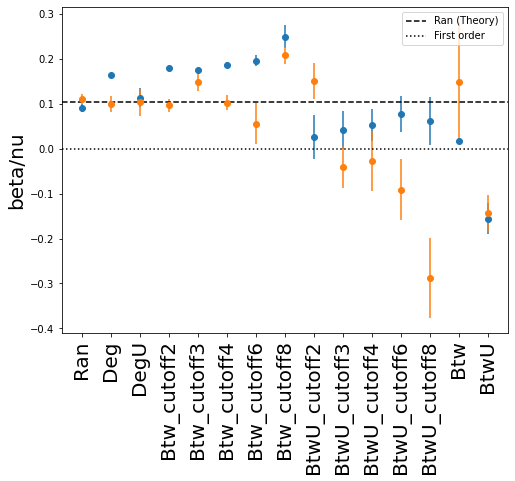

In [298]:
fig, ax = plt.subplots(figsize=(8,6))

X = range(df.shape[0])

ax.set_ylabel('beta/nu', fontsize=20)
ax.axhline(RAND_BETA_OVER_NU, linestyle='--', color='k', label='Ran (Theory)')
ax.axhline(0, linestyle=':', color='k', label='First order')
ax.plot(X, df.beta_over_nu, 'o')
ax.errorbar(X, y=df.beta_over_nu, yerr=df.beta_over_nu_err, linestyle='', color='C0')
ax.plot(X, df.beta_over_nu_2, 'o', color='C1')
ax.errorbar(X, y=df.beta_over_nu_2, yerr=df.beta_over_nu_2_err, linestyle='', color='C1')
plt.xticks(X, df.attack.values, rotation=90, fontsize=20)
ax.legend()
plt.show()

In [43]:
df[['attack', 'beta_over_nu_2_err']]

,attack,beta_over_nu_2_err
0,Ran,0.047561
1,Deg,0.019383
2,DegU,0.025386
3,Btw_cutoff2,0.016762
4,Btw_cutoff3,0.010047
5,Btw_cutoff4,0.004756
6,Btw_cutoff6,0.046986
7,Btw_cutoff8,0.021942
8,BtwU_cutoff2,0.025980
9,BtwU_cutoff3,0.022338


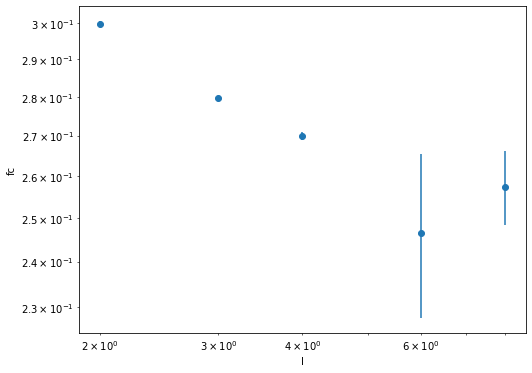

In [299]:
fig, ax = plt.subplots(figsize=(8,6))

btw_cutoff_attacks = df[df.attack.str.contains('Btw_')].attack.values
l_values = sorted([int(attack.split('cutoff')[1]) for attack in btw_cutoff_attacks])

X = l_values
Y = df[df.attack.isin(btw_cutoff_attacks)].fc
yerr = df[df.attack.isin(btw_cutoff_attacks)].fc_err
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('l')
ax.set_ylabel('fc')
ax.plot(X, Y, 'o')
ax.errorbar(X, y=Y, yerr=yerr, linestyle='', color='C0')
plt.show()

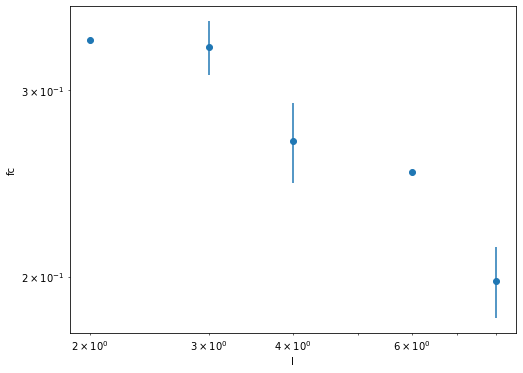

In [300]:
fig, ax = plt.subplots(figsize=(8,6))

btw_cutoff_attacks = df[df.attack.str.contains('BtwU_')].attack.values
l_values = sorted([int(attack.split('cutoff')[1]) for attack in btw_cutoff_attacks])

X = l_values
Y = df[df.attack.isin(btw_cutoff_attacks)].fc
yerr = df[df.attack.isin(btw_cutoff_attacks)].fc_err
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('l')
ax.set_ylabel('fc')
ax.plot(X, Y, 'o')
ax.errorbar(X, y=Y, yerr=yerr, linestyle='', color='C0')
plt.show()

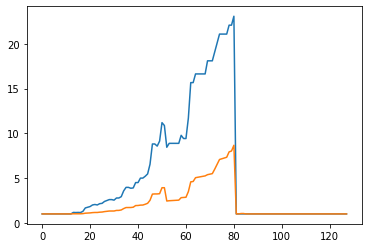

In [8]:
import numpy as np
txt = np.loadtxt('../networks/DT/DT_param/DT_param_N128/DT_param_N128_00000/Ran/comp_data.txt')
csv = np.loadtxt('../networks/DT/DT_param/DT_param_N128/DT_param_N128_00000/Ran/comp_data.csv')
X = np.arange(len(txt))
plt.plot(X, txt[:,2])
plt.plot(X, csv[:,2])

In [525]:
dfs = {}
dfs_fast = {}

sizes = [
    128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536
][3:]

nseeds = {
    128:   10000,
    256:   10000,
    512:   10000,
    1024:  10000,
    2048:  10000,
    4096:  10000,
    8192:  10000,
    16384: 10000,
    32768: 1000,
    65536: 1000
}

for size in sizes:
    csv_dir = f'../networks/DT/DT_param/DT_param_N{size}'
    base_file_name = f'/Ran_nSeeds{nseeds[size]}'
    df = pd.read_csv(csv_dir + f'{base_file_name}_cpp.csv')
    df_fast = pd.read_csv(csv_dir + f'{base_file_name}_fast.csv')
    
    dfs[size] = df
    dfs_fast[size] = df_fast

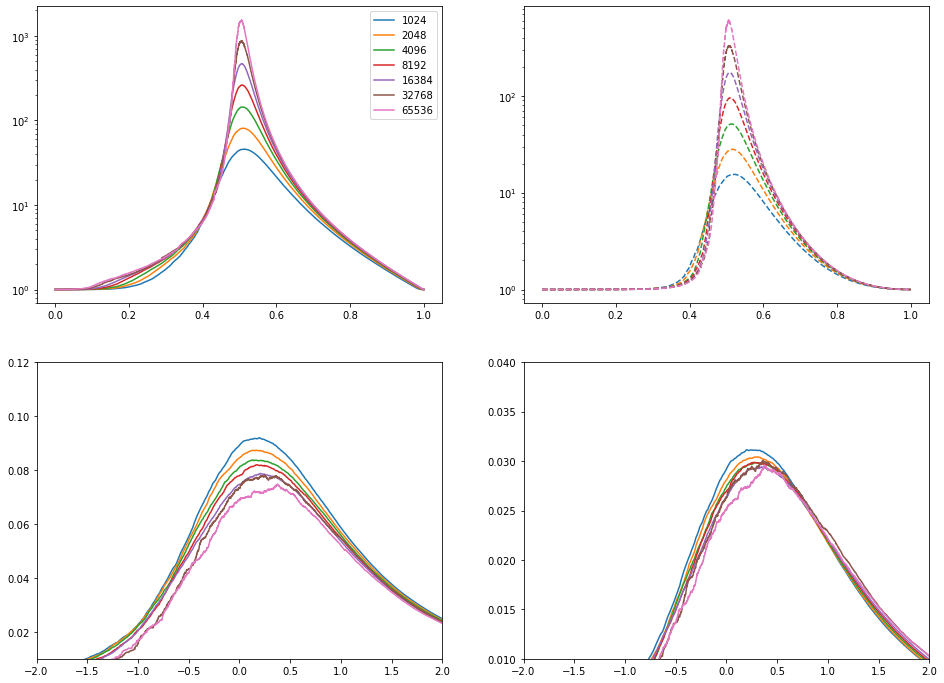

In [526]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_yscale('log')

nu = 4/3
gamma = 43/18

for i, size in enumerate(sizes):
    L = np.sqrt(size)
    df = dfs[size]
    df_fast = dfs_fast[size]
    axes[0][0].plot(df.f, df.meanS, color=f'C{i}', label=size)
    axes[0][1].plot(df_fast.f, df_fast.meanS, '--', color=f'C{i}')
    
    ax = axes[1][0]
    ax.set_yscale('linear')
    ax.set_xlim(-2, 2)
    ax.set_ylim(1e-2, 0.12)
    ax.plot((df.f-0.5)*L**(1/nu), df.meanS*L**(-gamma/nu))
    
    ax = axes[1][1]
    ax.set_yscale('linear')
    ax.set_xlim(-2, 2)
    ax.set_ylim(1e-2, 0.04)
    ax.plot((df_fast.f-0.5)*L**(1/nu), df_fast.meanS*L**(-gamma/nu))
    
axes[0][0].legend()
plt.show()

In [527]:
from scipy.signal import savgol_filter

def get_peaks(dfs, metric='meanS', spline=False):

    fc_values  = []
    max_values = []
    Ngcc_values = []

    for size, df in dfs.items():
        df = dfs[size]
        
        metric_values = df[metric].values
        sgcc_values = df['Sgcc'].values
        if spline:
            metric_values = savgol_filter(metric_values, 101, 2)
            sgcc_values = savgol_filter(sgcc_values, 101, 2)
        
        max_idx = metric_values.argmax()
        max_value = metric_values[max_idx]
        Ngcc_value = size*sgcc_values[max_idx]
        fc_values.append(max_idx/size)
        max_values.append(max_value)
        Ngcc_values.append(Ngcc_value)

    data =  {
        'net_size': dfs.keys(), 
        'peak_position': fc_values, 
        'peak_value': max_values,
        'Ngcc_value': Ngcc_values
    }
    peak_df = pd.DataFrame(data)
    peak_df.attrs['metric'] = metric
    return peak_df

def get_peaks_nSeeds(dfs, size, metric='meanS', spline=False, window=51):

    fc_values  = []
    max_values = []
    Ngcc_values = []
    
    for nSeeds, df in dfs.items():
        df = dfs[nSeeds]
        
        metric_values = df[metric].values
        sgcc_values = df['Sgcc'].values
        if spline:
            metric_values = savgol_filter(metric_values, window, 2)
            sgcc_values = savgol_filter(sgcc_values, window, 2)
            
        max_idx = metric_values.argmax()
        max_value = metric_values[max_idx]
        Ngcc_value = size*sgcc_values[max_idx]
        fc_values.append(max_idx/size)
        max_values.append(max_value)
        Ngcc_values.append(Ngcc_value)

    data =  {
        'nSeeds': dfs.keys(), 
        'peak_position': fc_values, 
        'peak_value': max_values,
        'Ngcc_value': Ngcc_values
    }
    peak_df = pd.DataFrame(data)
    peak_df.attrs['metric'] = metric
    return peak_df

def linear_regression(sizes, values, scale='loglog'):

    if scale == 'loglog':
        X = np.log(sizes)
        Y = np.log(values)
    elif scale == 'logy':
        X = np.array(sizes)
        Y = np.log(values)
    elif scale == 'logx':
        X = np.log(sizes)
        Y = np.array(values)
    elif scale == 'linear':
        X = np.array(sizes)
        Y = np.array(values)
    else:
        raise ValueError('ERROR: scale', scale, 'not supported')

    coeffs, cov = np.polyfit(X, Y, 1, cov=True)
    errors = np.sqrt(np.diag(cov))
    y_error = errors[0]

    slope, intercept = coeffs[0], coeffs[1]
    Y_pred = intercept + X*slope

    if scale in ['loglog', 'logy']:
        Y_pred = np.exp(Y_pred)

    return Y_pred, slope, y_error

peaks = get_peaks(dfs, spline=False)
peaks_fast = get_peaks(dfs_fast, spline=False)

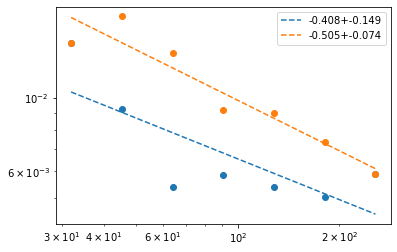

In [528]:
fc = 0.5

fig, ax = plt.subplots()
for i, _df in enumerate([peaks, peaks_fast]):
    X = np.sqrt(_df.net_size)
    Y = _df.peak_position - fc
    ax.plot(X, Y, 'o', color=f'C{i}')
    Y_pred, slope, y_error = linear_regression(X, Y)
    str_slope = '{:.3f}+-{:.3f}'.format(slope, y_error)
    ax.plot(X, Y_pred, '--', label=str_slope, color=f'C{i}')
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
plt.show()

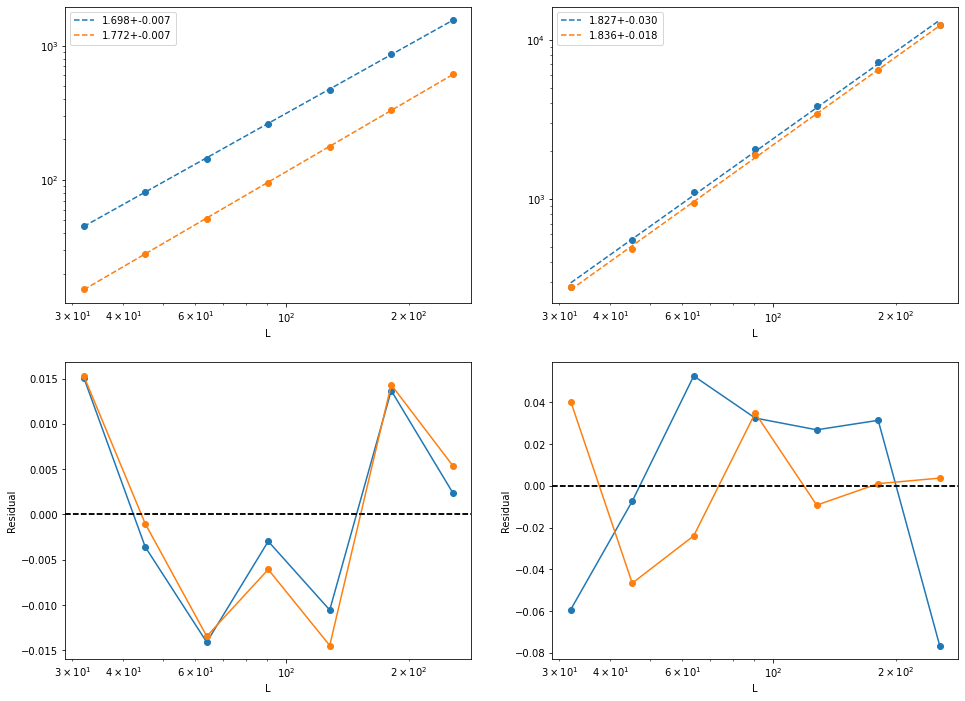

In [529]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for ax in axes.flatten():
    ax.set_xlabel('L')

for i, _df in enumerate([peaks, peaks_fast]):
    X = np.sqrt(_df.net_size)
    Y = _df.peak_value
    Y_pred, slope, y_error = linear_regression(X, Y)
    str_slope = '{:.3f}+-{:.3f}'.format(slope, y_error)
    ax = axes[0][0]
    ax.plot(X, Y, 'o', color=f'C{i}')
    ax.plot(X, Y_pred, '--', label=str_slope, color=f'C{i}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    
    ax = axes[1][0]
    ax.set_ylabel('Residual')
    ax.plot(X, np.log(Y)-np.log(Y_pred), '-o')
    ax.axhline(0, linestyle='--', color='k')
    ax.set_xscale('log')
    
    X = np.sqrt(_df.net_size)
    Y = _df.Ngcc_value
    Y_pred, slope, y_error = linear_regression(X, Y)
    str_slope = '{:.3f}+-{:.3f}'.format(slope, y_error)
    ax = axes[0][1]
    ax.plot(X, Y, 'o', color=f'C{i}')
    ax.plot(X, Y_pred, '--', label=str_slope, color=f'C{i}')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    
    ax = axes[1][1]
    ax.set_ylabel('Residual')
    ax.plot(X, np.log(Y)-np.log(Y_pred), '-o')
    ax.axhline(0, linestyle='--', color='k')
    ax.set_xscale('log')

In [530]:
peaks

,net_size,peak_position,peak_value,Ngcc_value
0,1024,0.514648,45.776355,279.8621
1,2048,0.509277,80.926816,555.1574
2,4096,0.505371,144.244774,1110.1901
3,8192,0.505859,262.732706,2049.1449
4,16384,0.505371,469.672809,3837.6147
5,32768,0.505035,866.750521,7260.5140
6,65536,0.505890,1543.741010,12275.8610


In [345]:
peaks_fast

,net_size,peak_position,peak_value,Ngcc_value
0,128,0.523438,2.934472,41.1406
1,256,0.523438,4.951166,75.5267
2,512,0.521484,8.604577,141.2827
3,1024,0.514648,15.495133,279.8621
4,2048,0.517578,28.171299,484.7334
5,4096,0.513672,51.417030,936.8919
6,8192,0.509155,95.722256,1877.5047
7,16384,0.505432,176.493541,3766.6120
8,32768,0.507355,333.632553,6479.8480


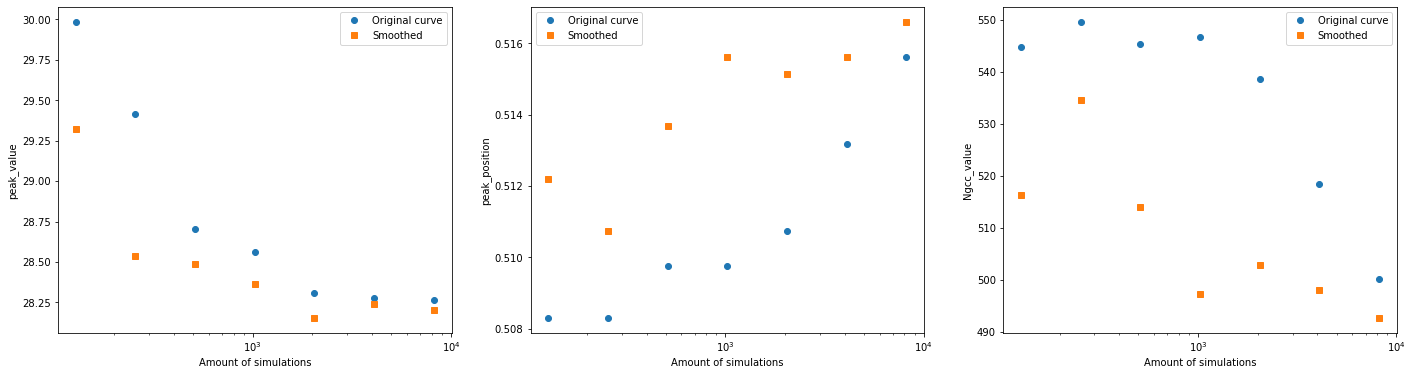

In [517]:
dfs = {}
dfs_fast = {}

size = 2048
nseeds_values = [
    128, 256, 512, 1024, 2048, 4096, 8192, #16384, 32768
]

for nseeds in nseeds_values:
    csv_dir = f'../networks/DT/DT_param/DT_param_N{size}'
    base_file_name = f'/Ran_nSeeds{nseeds}'
    #df = pd.read_csv(csv_dir + f'{base_file_name}_cpp.csv')
    df_fast = pd.read_csv(csv_dir + f'{base_file_name}_fast.csv')

    dfs_fast[nseeds] = df_fast

ncols = 3
fig, axes = plt.subplots(figsize=(8*ncols, 6), ncols=ncols)

labels = ['Original curve', 'Smoothed']
markers = ['o', 's']
cols = ['peak_value', 'peak_position', 'Ngcc_value']

for j, spline in enumerate([False, True]):
    peaks = get_peaks_nSeeds(dfs_fast, size, spline=spline, window=101)
    X = peaks.nSeeds
    for i, col in enumerate(cols):
        Y = peaks[col]
        ax = axes[i]
        ax.set_ylabel(col)
        ax.plot(X, Y, markers[j], label=labels[j])
    
for ax in axes:
    ax.set_xscale('log')
    ax.set_xlabel('Amount of simulations')
    ax.legend()
    
plt.show()

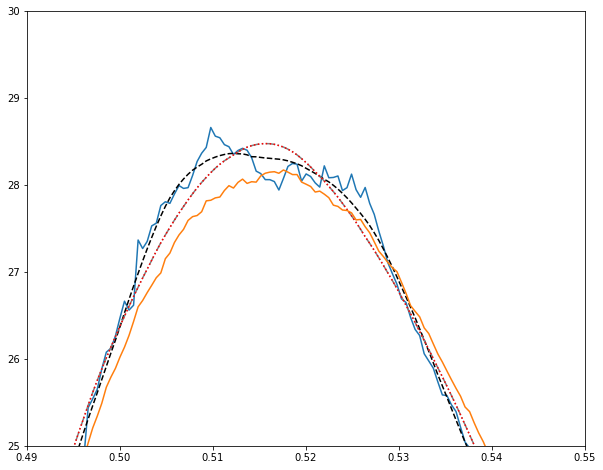

In [375]:
from scipy.signal import savgol_filter

size = 2048
csv_dir = f'../networks/DT/DT_param/DT_param_N{size}'
df_fast_1000 = pd.read_csv(csv_dir + f'/Ran_nSeeds1000_fast.csv')
df_fast_10000 = pd.read_csv(csv_dir + f'/Ran_nSeeds10000_fast.csv')
#df_fast_16384 = pd.read_csv(csv_dir + f'/Ran_nSeeds16384_fast.csv')

X = df_fast_1000.f
Y = df_fast_1000.meanS
Y2 = df_fast_10000.meanS
Y_filter = savgol_filter(Y, 51, 2)
Y_filter2 = savgol_filter(Y, 101, 2)
Y_filter3 = savgol_filter(Y, 2001, 2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, Y)
ax.plot(X, Y_filter, '--', color='k')
ax.plot(X, Y_filter2, '-.', color='gray')
ax.plot(X, Y_filter2, ':', color='red')

ax.plot(df_fast_10000.f, df_fast_10000.meanS)
#ax.plot(df_fast_16384.f, df_fast_16384.meanS)

ax.set_xlim(0.49, 0.55)
#ax.set_ylim(6, 16)
ax.set_ylim(25, 30)
plt.show()

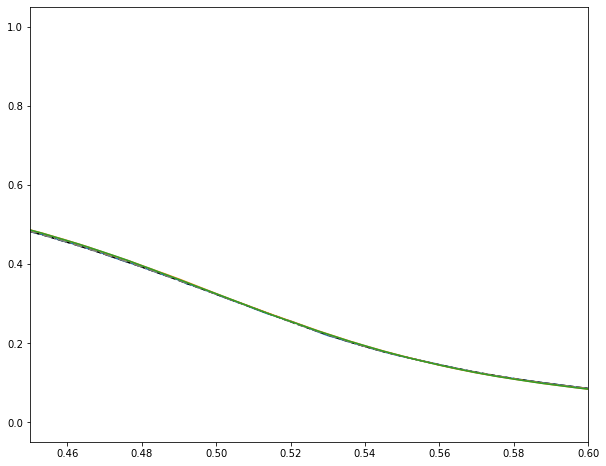

In [202]:
from scipy.signal import savgol_filter

size = 1024
csv_dir = f'../networks/DT/DT_param/DT_param_N{size}'
df_fast_1000 = pd.read_csv(csv_dir + f'/Ran_nSeeds1000_fast.csv')
df_fast_10000 = pd.read_csv(csv_dir + f'/Ran_nSeeds10000_fast.csv')
df_fast_16384 = pd.read_csv(csv_dir + f'/Ran_nSeeds16384_fast.csv')

X = df_fast_1000.f
Y = df_fast_1000.Sgcc
Y_filter = savgol_filter(Y, 51, 2)
Y_filter2 = savgol_filter(Y, 101, 2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, Y)
ax.plot(X, Y_filter, '--', color='k')
ax.plot(X, Y_filter, '-.', color='gray')

ax.plot(df_fast_10000.f, df_fast_10000.Sgcc)
ax.plot(df_fast_16384.f, df_fast_16384.Sgcc)

ax.set_xlim(0.45, 0.6)
#ax.set_ylim(6, 16)
plt.show()

0.4998+-0.0005


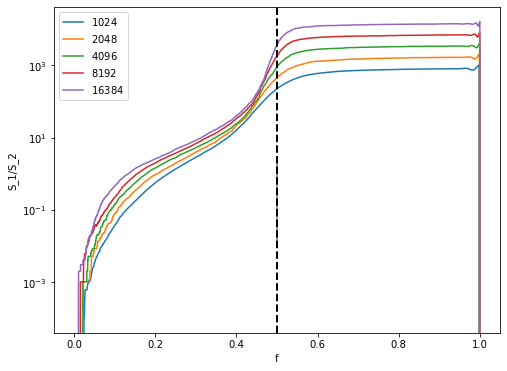

In [281]:
def compute_fc_v2(
    dfs, min_f, max_f, method='beta', only_next=False, verbose=False
):

    N_values = sorted(list(dfs.keys()))

    N1_over_N2 = {}
    for N in N_values:
        if method == 'beta':
            N1_over_N2[N] = ((N*dfs[N]['Sgcc'])/dfs[N]['Nsec']).values
        elif method == 'binder':
            N1_over_N2[N] = dfs[N]['meanS']/(N*(dfs[N]['Sgcc']**2)).values

    max_N = N_values[-1]
    mask = np.arange(int(min_f*max_N), int(max_f*max_N))
    n_values = len(mask)
    x = dfs[max_N]['f'][mask].values
    inter_values = []
    s = np.zeros(n_values)
    for i, Na in enumerate(N_values):
        for j, Nb in enumerate(N_values):
            if Nb <= Na:
                continue
            if only_next and j != i+1:
                continue
            mask = np.arange(int(min_f*Na), int(max_f*Na))
            xp = dfs[Na]['f'][mask].values
            fp = N1_over_N2[Na][mask]
            Na_values = np.interp(x, xp, fp)

            mask = np.arange(int(min_f*Nb), int(max_f*Nb))
            xp = dfs[Nb]['f'][mask].values
            fp = N1_over_N2[Nb][mask]
            Nb_values = np.interp(x, xp, fp)
            s += np.fabs(1 - Na_values/Nb_values)
            inter = np.argmin(s)/max_N
            if verbose:
                print(Na, Nb, inter+min_f, sep='\t')
            inter_values.append(inter)
    mean_inter = np.mean(inter_values)
    std_inter = np.std(inter_values)
    fc = min_f + mean_inter
    return fc, std_inter

def plot_fc(dfs, spline=False, method='binder'):
    ncols = 1
    nrows = 1
    fig, ax = plt.subplots(
        figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows
    )
    ax.set_xlabel('f')
    ax.set_ylabel('S_1/S_2')
    #ax.set_xlim(fmin, fmax)
    #ax.set_ylim(ymin, ymax)
    for i, (size, df) in enumerate(dfs.items()):
        
        meanS_values = dfs[size]['meanS'].values
        sgcc_values = dfs[size]['Sgcc'].values
        
        if spline:
            meanS_values = savgol_filter(meanS_values, 101, 2)
            sgcc_values = savgol_filter(sgcc_values, 101, 2)
        if method=='binder':
            Y = meanS_values/(size*(sgcc_values**2))
        elif method=='beta':
            nsec_values = dfs[size]['Nsec'].values
            if spline:
                nsec_values = savgol_filter(nsec_values, 101, 2)
                
            Y = nsec_values / sgcc_values
                
        ax.plot(
            df.f, Y, '-', 
            label=r'${{{}}}$'.format(size), #color=colors[i]
        )
        ax.legend()
    ax.axvline(fc, linestyle='--', color='k', linewidth=2)
    ax.fill_betweenx(
        [ymin, ymax], fc-fc_err, fc+fc_err, color='k', alpha=0.3
    )

    ax.set_yscale('log')
    plt.show()

fmin, fmax = (0.495, 0.51)
ymin, ymax = (0.01, 2)

method = 'beta'

fc, fc_err = compute_fc_v2(dfs, min_f=0.45, max_f=0.55, method=method, only_next=True)
print('{:.4f}+-{:.4f}'.format(fc, fc_std))
plot_fc(dfs, spline=False, method=method)

In [ ]:
fmin, fmax = (0.495, 0.51)
ymin, ymax = (0.01, 2)

fc, fc_err = compute_fc_v2(dfs_fast, min_f=0.45, max_f=0.55, method='binder')
print(fc, fc_std)
plot_fc(dfs_fast, spline=True)

512 21
1024 51
2048 91


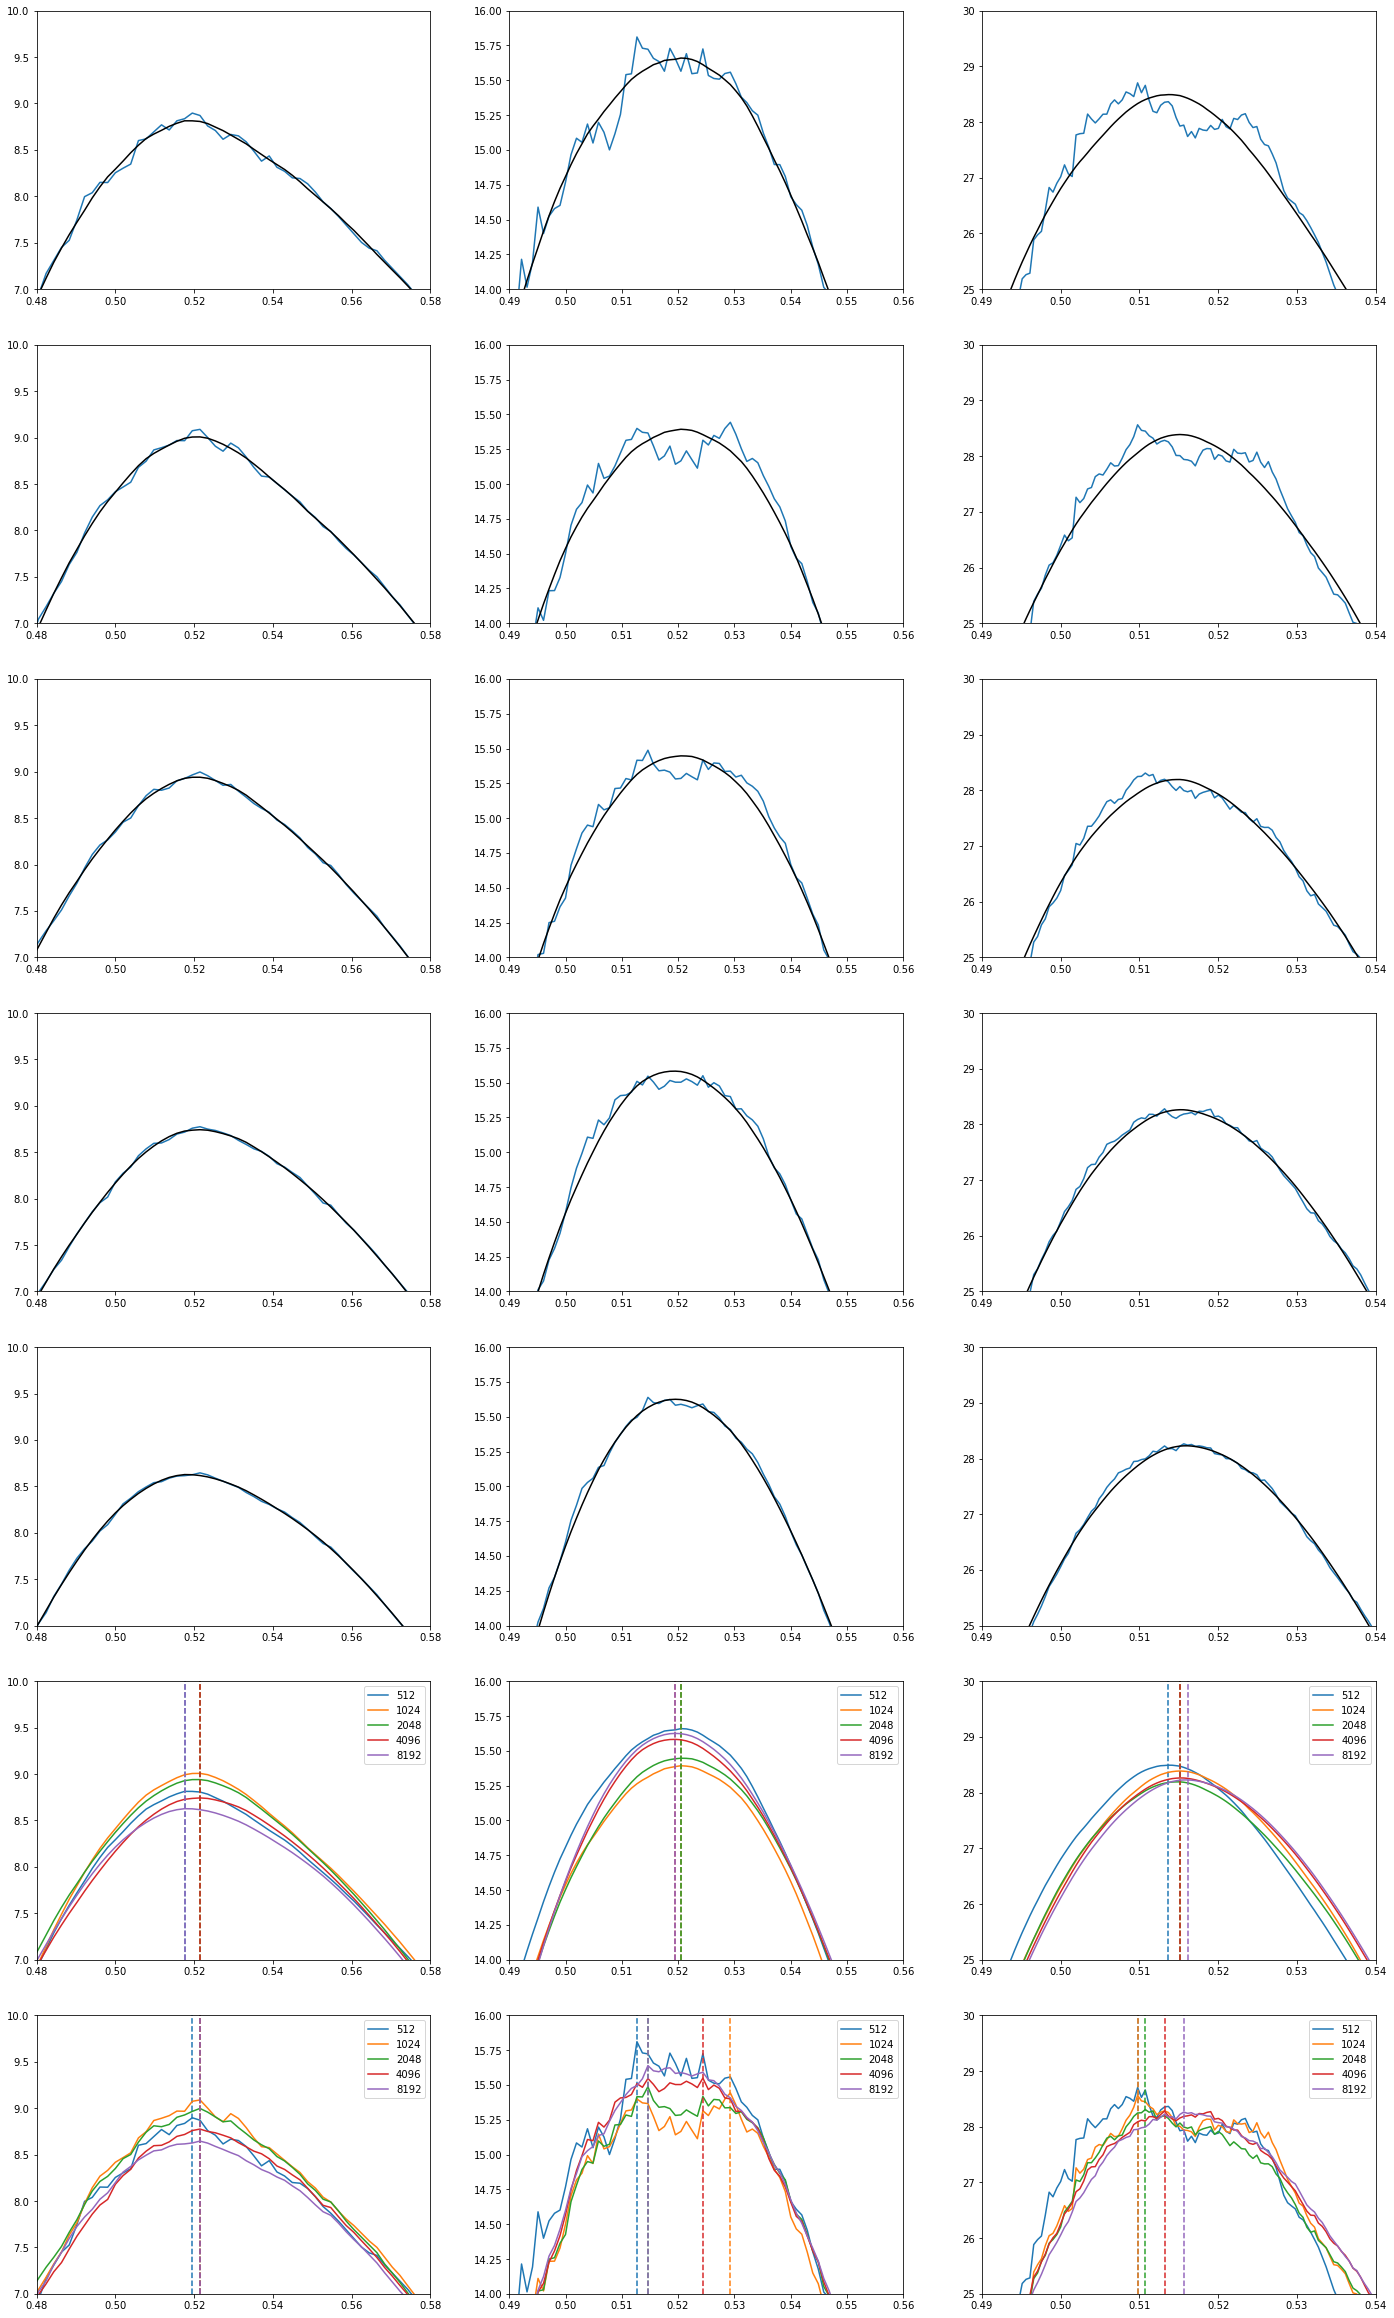

In [521]:
params = {
    512: {
        'xmin': 0.48,
        'xmax': 0.58,
        'ymin': 7,
        'ymax': 10,
        'window': 21
    },
    1024: {
        'xmin': 0.49,
        'xmax': 0.56,
        'ymin': 14,
        'ymax': 16,
        'window': 51
    },
    2048: {
        'xmin': 0.49,
        'xmax': 0.54,
        'ymin': 25,
        'ymax': 30,
        'window': 91
    },
    4096: {
        'xmin': 0.495,
        'xmax': 0.53,
        'ymin': 44,
        'ymax': 54,
        'window': 101
    },
}

#sizes = [512, 1024, 2048, 4096]
sizes = [512, 1024, 2048]
#nseeds_values = [100, 1000, 10000]
nseeds_values = [
    #128, 256, 
    512, 
    1024, 2048, 4096, 8192, 
    #16384, 32768
]
max_nseeds = max(nseeds_values)
dfs_fast = {}
for size in sizes:
    dfs_fast[size] = {}
    for nseeds in nseeds_values:
        csv_dir = f'../networks/DT/DT_param/DT_param_N{size}'
        dfs_fast[size][nseeds] = pd.read_csv(csv_dir + f'/Ran_nSeeds{nseeds}_fast.csv')

X_smoothed = {}
Y_smoothed = {}
        
ncols = len(sizes)
nrows = len(nseeds_values) + 2
fig, axes = plt.subplots(figsize=(8*ncols, 6*nrows), ncols=ncols, nrows=nrows)

for i, size in enumerate(sizes):
    params_ = params[size]
    df = dfs_fast[size][max_nseeds]
    X = df.f
    params_ = params[size]
    window = params_['window']
    print(size, window)
    
    for j, nseeds in enumerate(nseeds_values):
        ax = axes[j][i]
        ax.set_xlim(params_['xmin'], params_['xmax'])
        ax.set_ylim(params_['ymin'], params_['ymax'])  
        
        df = dfs_fast[size][nseeds]
        Y_smoothed[nseeds] = savgol_filter(df.meanS, window, 2)
        ax.plot(df.f, df.meanS)
        ax.plot(X, Y_smoothed[nseeds], color='k')
        
    for k, nseeds in enumerate(nseeds_values):
        ax = axes[j+1][i]
        ax.set_xlim(params_['xmin'], params_['xmax'])
        ax.set_ylim(params_['ymin'], params_['ymax'])  
        #ax.set_xlim(0.5, 0.54)
        #ax.set_ylim(15, 15.7)
        ax.plot(X, Y_smoothed[nseeds], label=nseeds)
        peak_pos = df.f[Y_smoothed[nseeds].argmax()]
        ax.axvline(peak_pos, color=f'C{k}', linestyle='--')
        ax.legend()
        
    for k, nseeds in enumerate(nseeds_values):
        ax = axes[j+2][i]
        ax.set_xlim(params_['xmin'], params_['xmax'])
        ax.set_ylim(params_['ymin'], params_['ymax'])  
        #ax.set_xlim(0.5, 0.54)
        #ax.set_ylim(15, 15.7)
        df = dfs_fast[size][nseeds]
        ax.plot(X, df.meanS, label=nseeds)
        peak_pos = df.f[df.meanS.idxmax()]
        ax.axvline(peak_pos, color=f'C{k}', linestyle='--')
        ax.legend()

plt.show()

In [522]:
for i, size in enumerate(sizes):
    params_ = params[size]
    df = dfs_fast[size][max_nseeds] 
    delta_f = df.f.values[1]
    points = int((params_['xmax']-params_['xmin'])//delta_f)
    window = params_['window']
    #points = points // 2
    #window = points if points%2 else points-1
    X_max_smoothed = df.f
    Y_max_smoothed = savgol_filter(df.meanS, window, 2)
    
    print(size, delta_f, window)
    
    ax = axes[0][i]
    params_ = params[size]
    ax.plot(df.f, df.meanS)
    ax.set_xlim(params_['xmin'], params_['xmax'])
    ax.set_ylim(params_['ymin'], params_['ymax'])    
    ax.plot(X_max_smoothed, Y_max_smoothed, color='k')
    
       
    ax = axes[1][i]
    nseeds = nseeds_values[0]
    df = dfs_fast[size][nseeds] 
    delta_f = df.f.values[1]
    X_smoothed[nseeds] = df.f
    Y_smoothed[nseeds] = savgol_filter(df.meanS, window, 2)
    
    params_ = params[size]
    ax.plot(df.f, df.meanS)
    ax.set_xlim(params_['xmin'], params_['xmax'])
    ax.set_ylim(params_['ymin'], params_['ymax'])    
    ax.plot(X_smoothed[nseeds], Y_smoothed[nseeds], color='k')
    
    
    ax = axes[2][i]
    nseeds = nseeds_values[1]
    df = dfs_fast[size][nseeds] 
    delta_f = df.f.values[1]
    X_smoothed[nseeds] = df.f
    Y_smoothed[nseeds] = savgol_filter(df.meanS, window, 2)

    ax.plot(df.f, df.meanS)
    ax.set_xlim(params_['xmin'], params_['xmax'])
    ax.set_ylim(params_['ymin'], params_['ymax'])    
    ax.plot(X_smoothed[nseeds], Y_smoothed[nseeds], color='k')
    
    ax = axes[3][i]
    nseeds = nseeds_values[0]
    df = dfs_fast[size][nseeds]
    ax.plot(df.f, df.meanS)
    ax.plot(X_smoothed[nseeds], Y_smoothed[nseeds], color='k')
    
    nseeds = nseeds_values[1]
    df = dfs_fast[size][nseeds]
    ax.plot(df.f, df.meanS)
    ax.plot(X_smoothed[nseeds], Y_smoothed[nseeds], color='k')
    
    ax.plot(X_max_smoothed, Y_max_smoothed, color='k')
    ax.set_xlim(params_['xmin'], params_['xmax'])
    ax.set_ylim(params_['ymin'], params_['ymax']) 
plt.show()

512 0.001953125 21
1024 0.0009765625 51
2048 0.00048828125 91
